<a href="https://colab.research.google.com/github/DanielAntu/preferencia_praia_montanha/blob/main/an%C3%A1lise_de_preferencia_de_montanha_e_praia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1 = prefere montanha

0 = prefere praia

In [ ]:
!kaggle datasets download jahnavipaliwal/mountains-vs-beaches-preference

Dataset URL: https://www.kaggle.com/datasets/jahnavipaliwal/mountains-vs-beaches-preference
License(s): apache-2.0
  0% 0.00/888k [00:00<?, ?B/s]
100% 888k/888k [00:00<00:00, 41.1MB/s]


In [ ]:
import zipfile
import os

def extract_zip(zip_path, extract_to='.'):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
    print(f"Arquivo {zip_path} extraído para {extract_to}")

# Exemplo de uso
zip_path = 'mountains-vs-beaches-preference.zip'
extract_to = '/content'
extract_zip(zip_path, extract_to)

Arquivo mountains-vs-beaches-preference.zip extraído para /content


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('mountains_vs_beaches_preferences.csv')
df.head()

,Age,Gender,Income,Education_Level,Travel_Frequency,Preferred_Activities,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,Pets,Environmental_Concerns,Preference
0,56,male,71477,bachelor,9,skiing,2477,urban,175,267,summer,0,1,1
1,69,male,88740,master,1,swimming,4777,suburban,228,190,fall,0,1,0
2,46,female,46562,master,0,skiing,1469,urban,71,280,winter,0,0,1
3,32,non-binary,99044,high school,6,hiking,1482,rural,31,255,summer,1,0,1
4,60,female,106583,high school,5,sunbathing,516,suburban,23,151,winter,1,1,0


In [ ]:
df.shape

(52444, 14)

In [ ]:
df.describe()

,Age,Income,Travel_Frequency,Vacation_Budget,Proximity_to_Mountains,Proximity_to_Beaches,Pets,Environmental_Concerns,Preference
count,52444.000000,52444.000000,52444.000000,52444.000000,52444.000000,52444.000000,52444.000000,52444.000000,52444.000000
mean,43.507360,70017.271280,4.489265,2741.799062,149.943502,149.888452,0.500858,0.498436,0.250706
std,14.985597,28847.560428,2.876130,1296.922423,86.548644,86.469248,0.500004,0.500002,0.433423
min,18.000000,20001.000000,0.000000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,45048.250000,2.000000,1622.000000,75.000000,75.750000,0.000000,0.000000,0.000000
50%,43.000000,70167.000000,4.000000,2733.000000,150.000000,150.000000,1.000000,0.000000,0.000000
75%,56.000000,95108.500000,7.000000,3869.000000,225.000000,225.000000,1.000000,1.000000,1.000000
max,69.000000,119999.000000,9.000000,4999.000000,299.000000,299.000000,1.000000,1.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52444 entries, 0 to 52443
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     52444 non-null  int64 
 1   Gender                  52444 non-null  object
 2   Income                  52444 non-null  int64 
 3   Education_Level         52444 non-null  object
 4   Travel_Frequency        52444 non-null  int64 
 5   Preferred_Activities    52444 non-null  object
 6   Vacation_Budget         52444 non-null  int64 
 7   Location                52444 non-null  object
 8   Proximity_to_Mountains  52444 non-null  int64 
 9   Proximity_to_Beaches    52444 non-null  int64 
 10  Favorite_Season         52444 non-null  object
 11  Pets                    52444 non-null  int64 
 12  Environmental_Concerns  52444 non-null  int64 
 13  Preference              52444 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 5.6+ MB


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

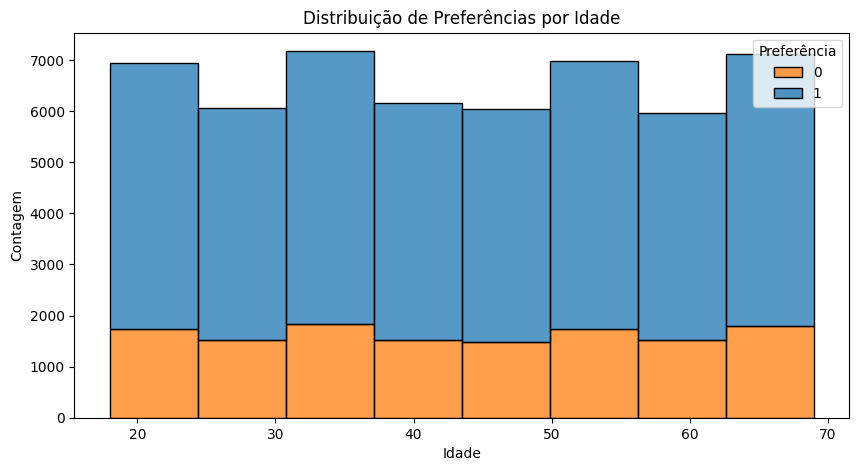

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='Age', hue='Preference', multiple='stack', bins=8)
plt.title('Distribuição de Preferências por Idade')
plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.legend(title='Preferência', labels=['0', '1'])
plt.show()

In [ ]:
df['Gender'].value_counts()

,count
Gender,
female,17638
male,17522
non-binary,17284


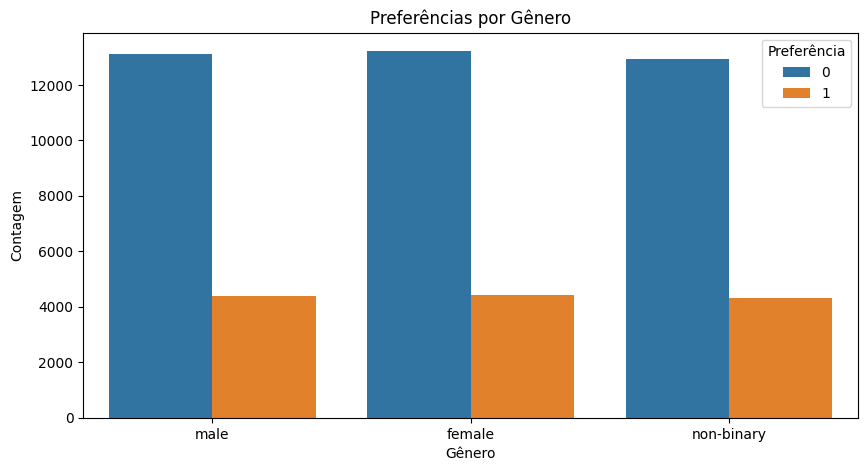

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Gender', hue='Preference')
plt.title('Preferências por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.legend(title='Preferência', labels=['0', '1'])
plt.show()

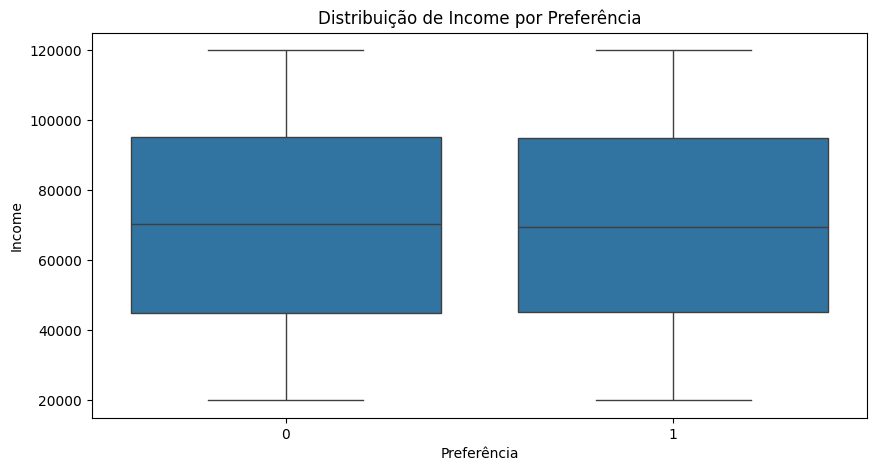

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Preference', y='Income')
plt.title('Distribuição de Income por Preferência')
plt.xlabel('Preferência')
plt.ylabel('Income')
plt.xticks([0, 1], ['0', '1'])
plt.show()

In [ ]:
df['Education_Level'].value_counts()

,count
Education_Level,
doctorate,13293
bachelor,13127
high school,13072
master,12952


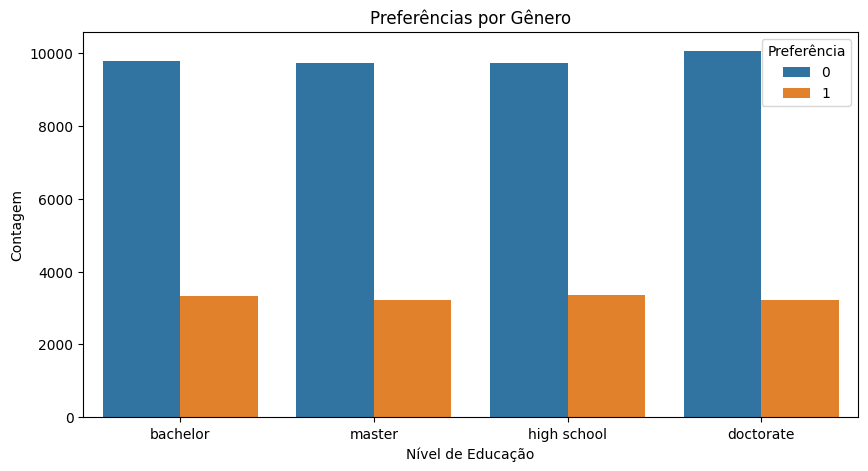

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Education_Level', hue='Preference')
plt.title('Preferências por Gênero')
plt.xlabel('Nível de Educação')
plt.ylabel('Contagem')
plt.legend(title='Preferência', labels=['0', '1'])
plt.show()

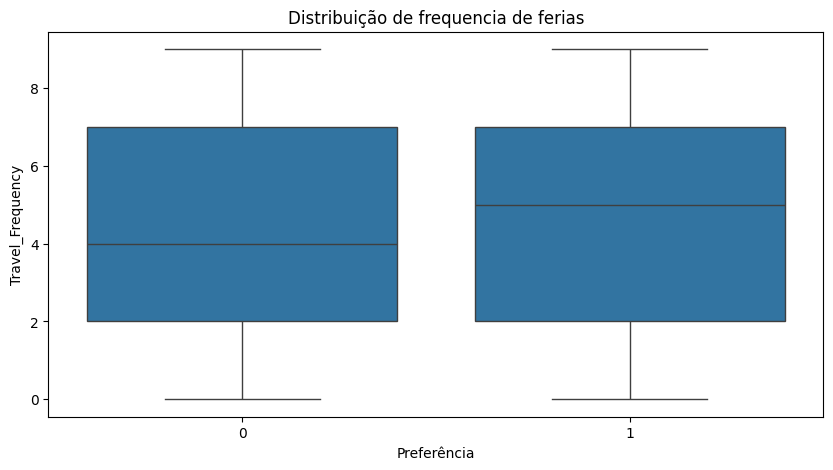

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Preference', y='Travel_Frequency')
plt.title('Distribuição de frequencia de ferias')
plt.xlabel('Preferência')
plt.ylabel('Travel_Frequency')
plt.xticks([0, 1], ['0', '1'])
plt.show()

In [ ]:
df['Preferred_Activities'].value_counts()

,count
Preferred_Activities,
sunbathing,13221
skiing,13167
hiking,13102
swimming,12954


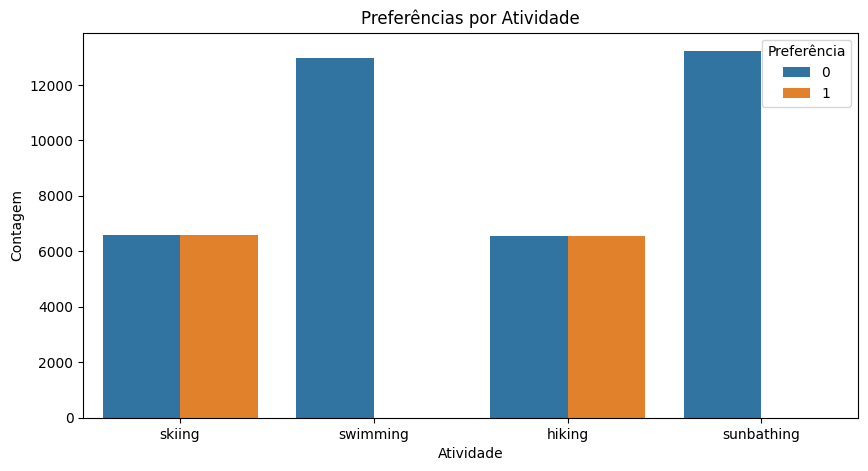

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Preferred_Activities', hue='Preference')
plt.title('Preferências por Atividade')
plt.xlabel('Atividade')
plt.ylabel('Contagem')
plt.legend(title='Preferência', labels=['0', '1'])
plt.show()

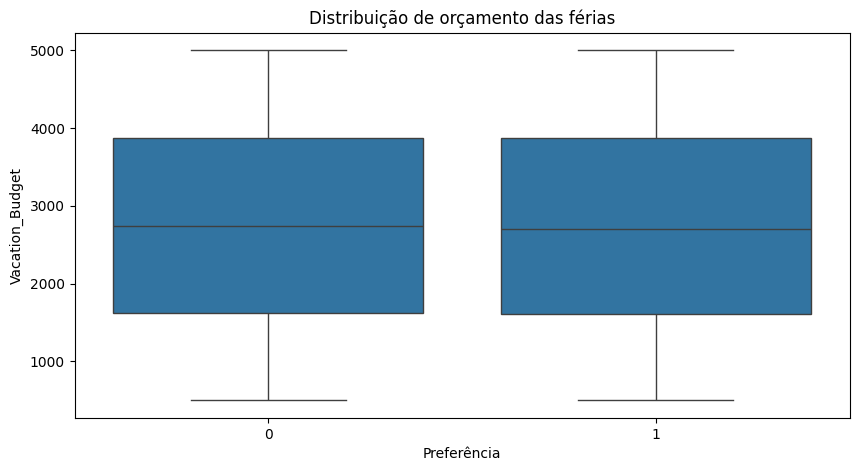

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Preference', y='Vacation_Budget')
plt.title('Distribuição de orçamento das férias')
plt.xlabel('Preferência')
plt.ylabel('Vacation_Budget')
plt.xticks([0, 1], ['0', '1'])
plt.show()

In [ ]:
df['Location'].value_counts()

,count
Location,
suburban,17503
urban,17476
rural,17465


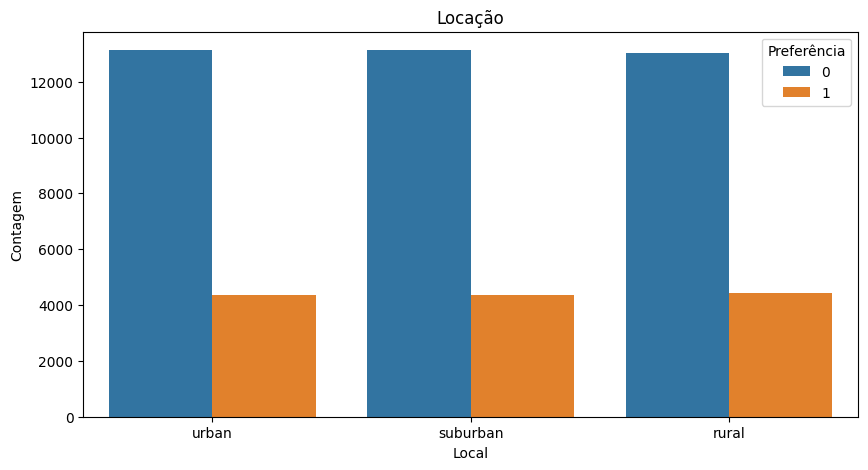

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Location', hue='Preference')
plt.title('Locação')
plt.xlabel('Local')
plt.ylabel('Contagem')
plt.legend(title='Preferência', labels=['0', '1'])
plt.show()

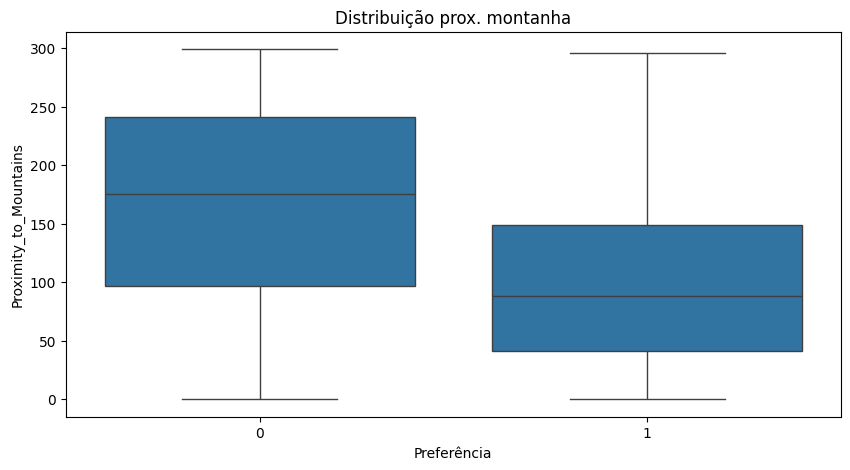

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Preference', y='Proximity_to_Mountains')
plt.title('Distribuição prox. montanha')
plt.xlabel('Preferência')
plt.ylabel('Proximity_to_Mountains')
plt.xticks([0, 1], ['0', '1'])
plt.show()

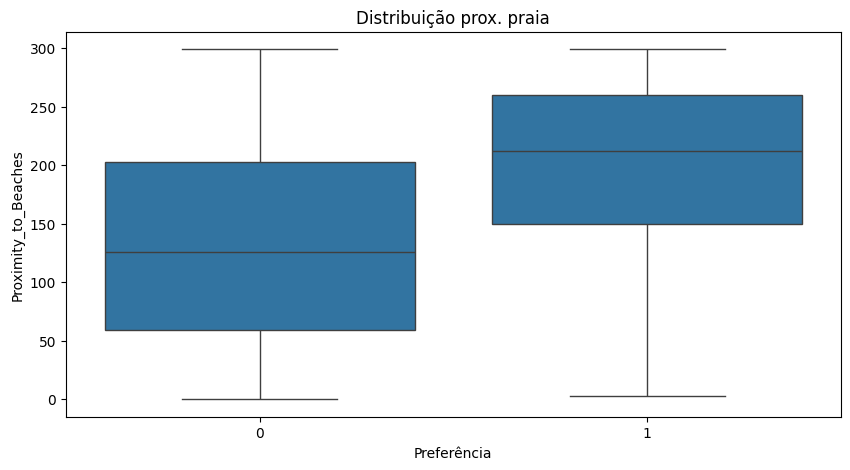

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Preference', y='Proximity_to_Beaches')
plt.title('Distribuição prox. praia')
plt.xlabel('Preferência')
plt.ylabel('Proximity_to_Beaches')
plt.xticks([0, 1], ['0', '1'])
plt.show()

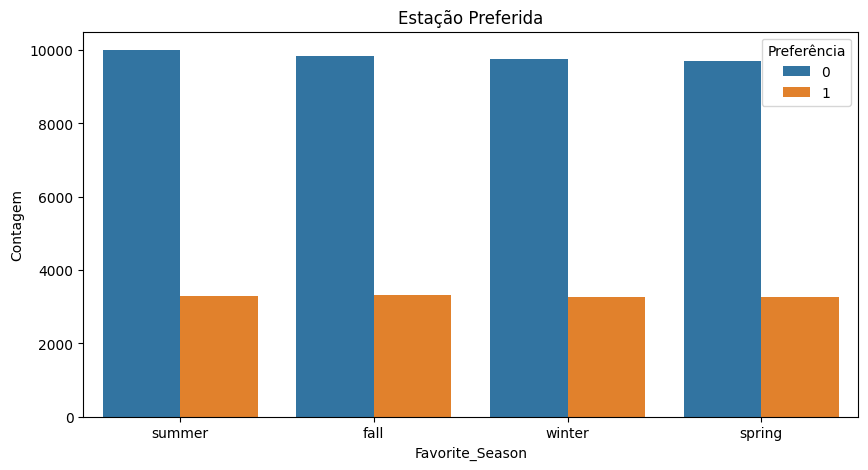

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Favorite_Season', hue='Preference')
plt.title('Estação Preferida')
plt.xlabel('Favorite_Season')
plt.ylabel('Contagem')
plt.legend(title='Preferência', labels=['0', '1'])
plt.show()

In [ ]:
df['Pets'].value_counts()

,count
Pets,
1,26267
0,26177


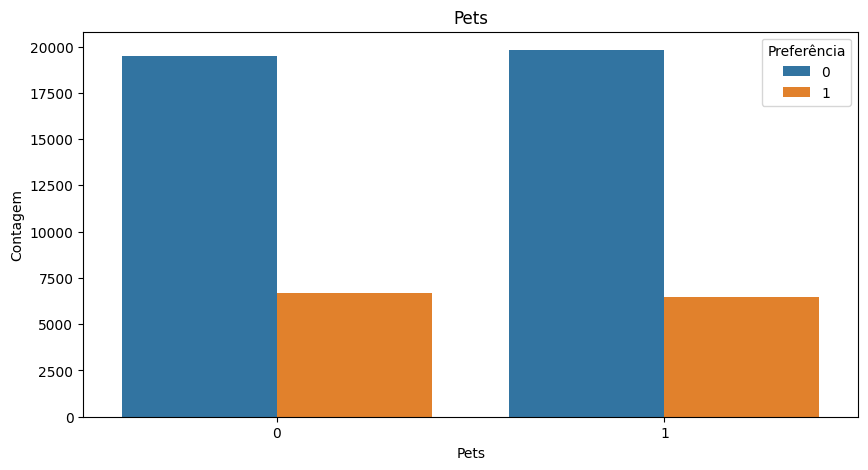

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Pets', hue='Preference')
plt.title('Pets')
plt.xlabel('Pets')
plt.ylabel('Contagem')
plt.legend(title='Preferência', labels=['0', '1'])
plt.show()

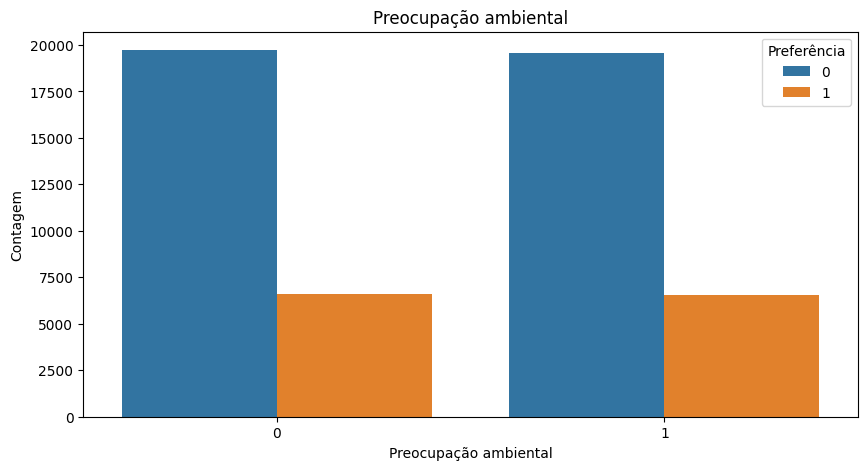

In [ ]:
'Environmental_Concerns'
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Environmental_Concerns', hue='Preference')
plt.title('Preocupação ambiental')
plt.xlabel('Preocupação ambiental')
plt.ylabel('Contagem')
plt.legend(title='Preferência', labels=['0', '1'])
plt.show()

In [ ]:
categorical_columns = df.select_dtypes(include='object').columns
categorical_columns

Index(['Gender', 'Education_Level', 'Preferred_Activities', 'Location',
       'Favorite_Season'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

In [ ]:
for coluna in categorical_columns:
  df[f'{coluna}_num'] = label_encoder.fit_transform(df[coluna])

df.head()

,Age,Gender,Income,Education_Level,Travel_Frequency,Preferred_Activities,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,Pets,Environmental_Concerns,Preference,Gender_num,Education_Level_num,Preferred_Activities_num,Location_num,Favorite_Season_num
0,56,male,71477,bachelor,9,skiing,2477,urban,175,267,summer,0,1,1,1,0,1,2,2
1,69,male,88740,master,1,swimming,4777,suburban,228,190,fall,0,1,0,1,3,3,1,0
2,46,female,46562,master,0,skiing,1469,urban,71,280,winter,0,0,1,0,3,1,2,3
3,32,non-binary,99044,high school,6,hiking,1482,rural,31,255,summer,1,0,1,2,2,0,0,2
4,60,female,106583,high school,5,sunbathing,516,suburban,23,151,winter,1,1,0,0,2,2,1,3


In [ ]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

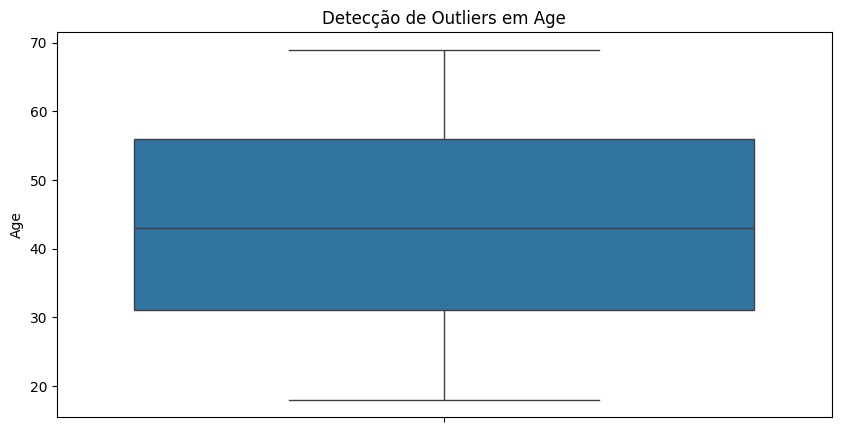

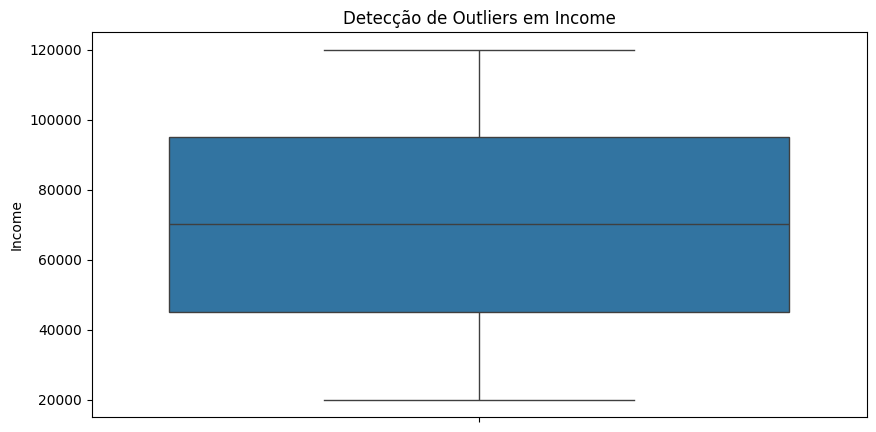

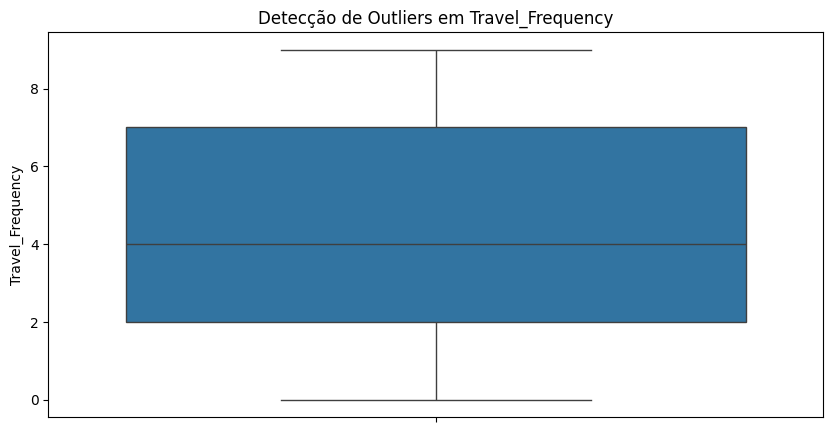

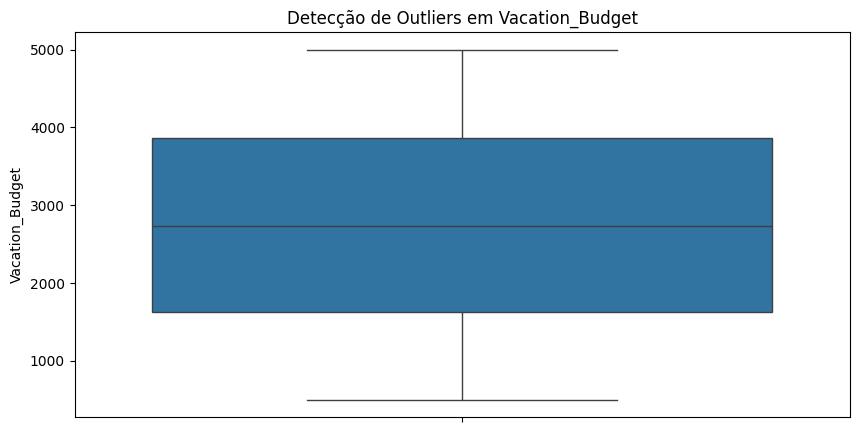

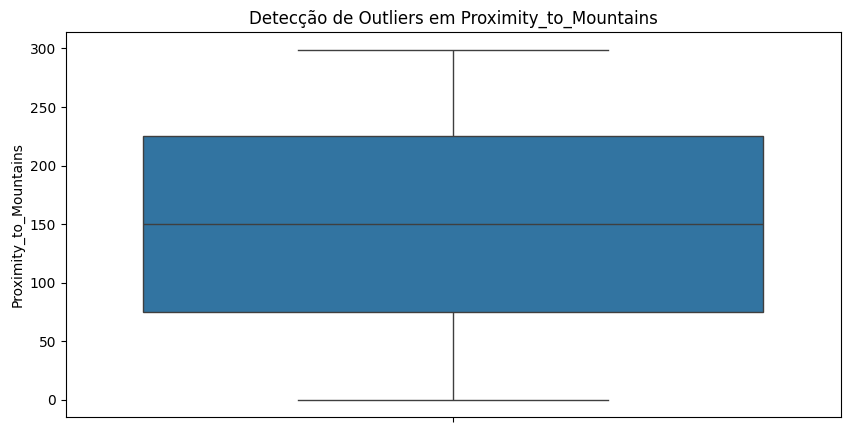

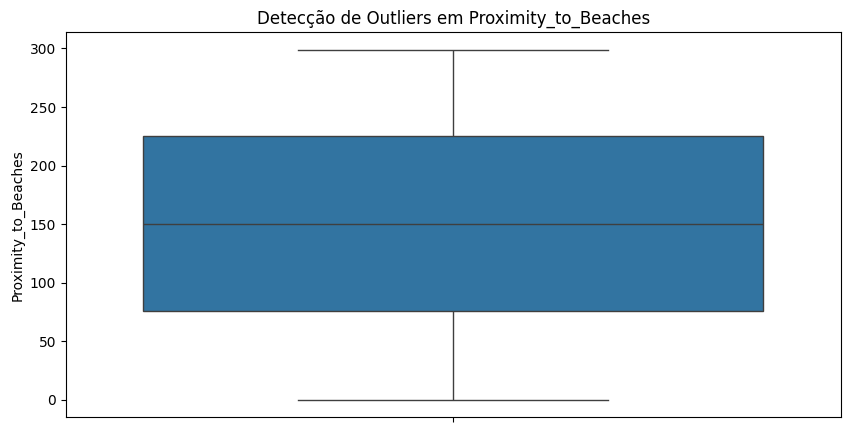

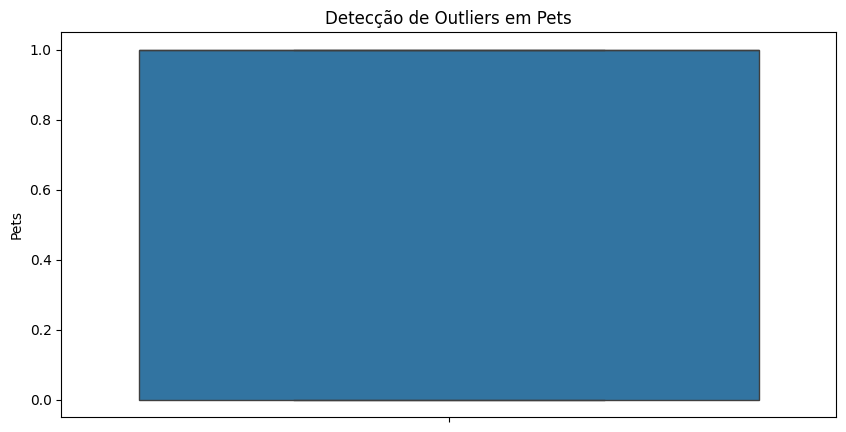

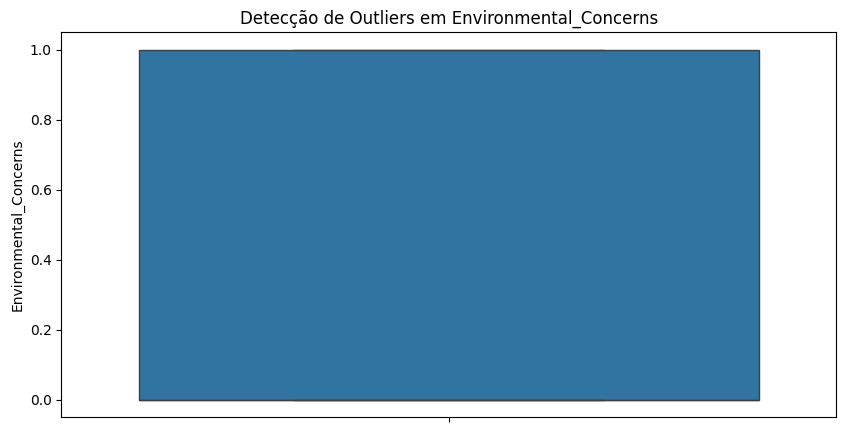

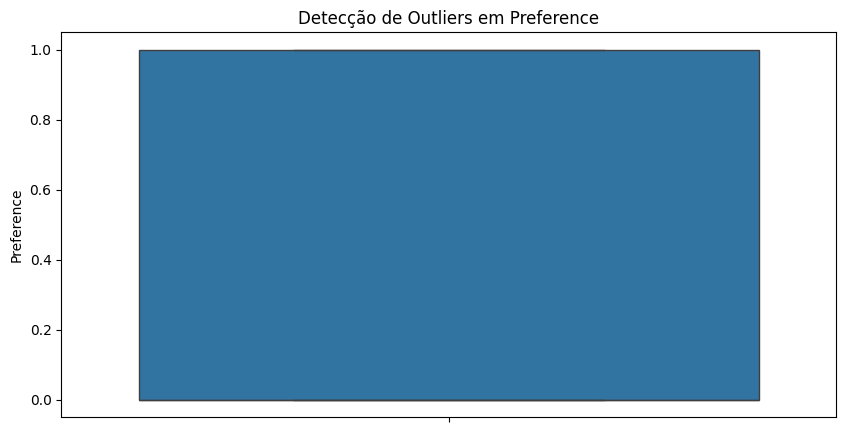

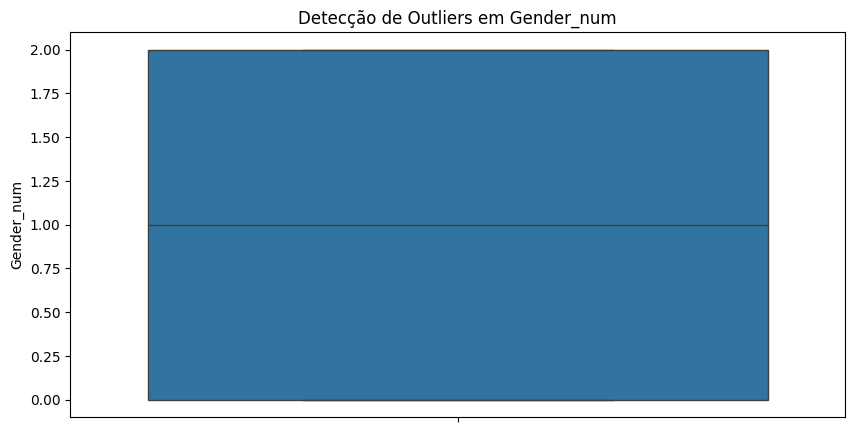

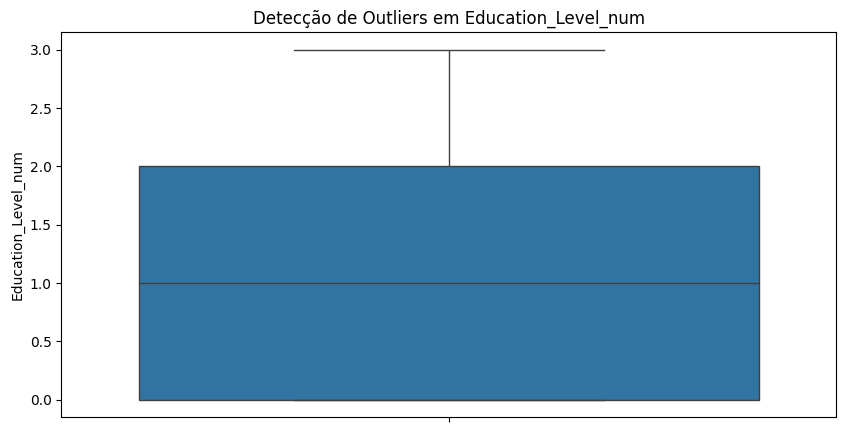

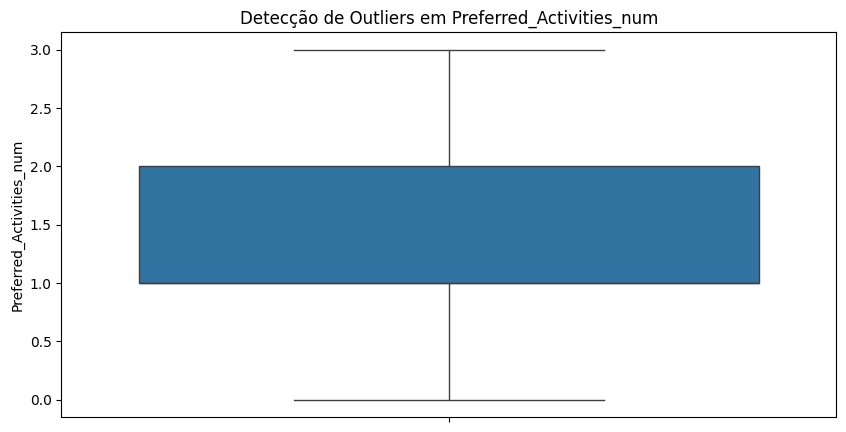

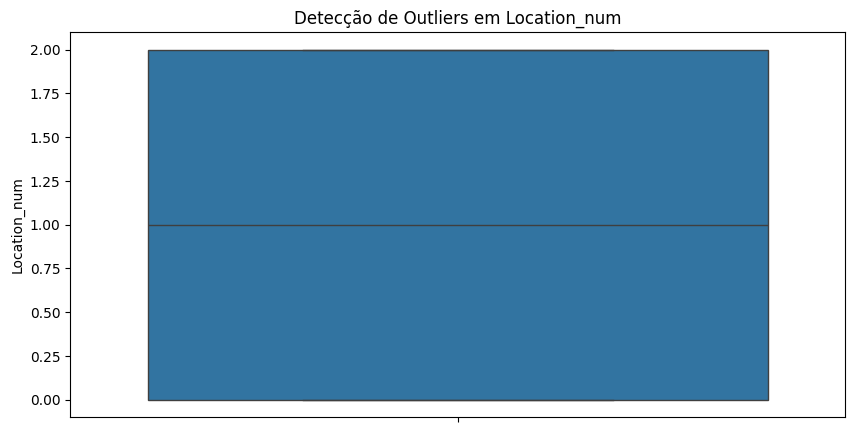

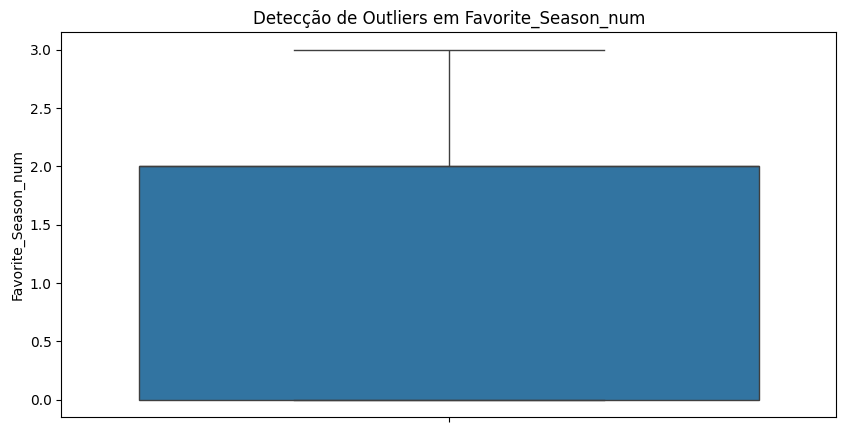

In [ ]:
for coluna in numerical_columns:
  plt.figure(figsize=(10, 5))
  sns.boxplot(data=df, y=coluna)
  plt.title(f'Detecção de Outliers em {coluna}')
  plt.ylabel(coluna)
  plt.show()


In [ ]:
df.to_csv('/content/drive/MyDrive/treino/preferencia de montanha ou praia/df_tratado.csv', index=False)

In [ ]:
df.head(1)

,Age,Gender,Income,Education_Level,Travel_Frequency,Preferred_Activities,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,Pets,Environmental_Concerns,Preference,Gender_num,Education_Level_num,Preferred_Activities_num,Location_num,Favorite_Season_num
0,56,male,71477,bachelor,9,skiing,2477,urban,175,267,summer,0,1,1,1,0,1,2,2


In [ ]:
df[['Favorite_Season', 'Favorite_Season_num']].value_counts()

,,count
Favorite_Season,Favorite_Season_num,
summer,2,13303
fall,0,13170
winter,3,13019
spring,1,12952


In [ ]:
lista = []
lista_2 = []

def build_list(list, coluna):
  for i in df[coluna].unique():
      list.append(i)

build_list(lista, 'Favorite_Season')
build_list(lista_2, 'Favorite_Season_num')
print(lista)
print(lista_2)

['summer', 'fall', 'winter', 'spring']
[2, 0, 3, 1]


In [ ]:
list_item = []
for i, j in zip(lista, lista_2):
    list_item.append((j, i))

list_item

[(2, 'summer'), (0, 'fall'), (3, 'winter'), (1, 'spring')]